In [2]:
!pip3 install datasets


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


1. 加载数据集

In [3]:
from datasets import load_dataset
dataset = load_dataset("staghado/ArXiv-tables")["train"]

/Users/shuaizou/Desktop/NLP - Group Assignment/RAG_on_arXiv_ML/nlp_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2. 查看结构和字段

In [4]:
print(dataset[0].keys())

dict_keys(['id', 'arxiv_id', 'page', 'bounding_box', 'latex_content', 'extracted_content', 'similarity_score', 'table_image', 'page_image'])


3. 数据集大小 & 文档数量

In [5]:
print("样本总数：", len(dataset))

样本总数： 1328


4. 分析字段内容（文档内容、长度分布）

In [8]:
!pip3 install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 3.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


<Axes: title={'center': 'Length Distribution of LaTeX content'}, ylabel='Frequency'>

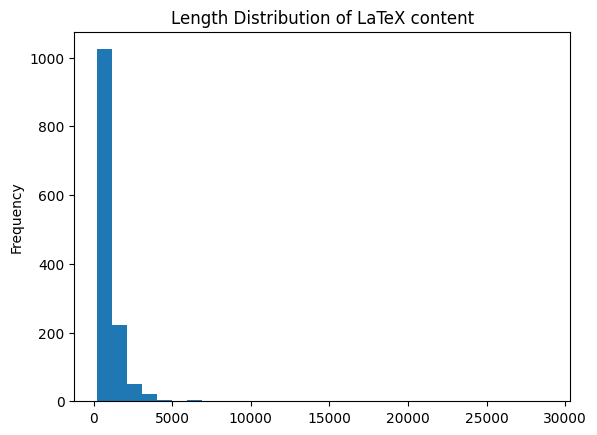

In [9]:
import pandas as pd
lengths = [len(str(x["latex_content"])) for x in dataset]
df = pd.DataFrame({"length": lengths})
df["length"].plot.hist(bins=30, title="Length Distribution of LaTeX content")

5. 统计词汇表大小（粗略）

In [10]:
from collections import Counter
import re

vocab = Counter()
for entry in dataset.select(range(500)):  # 采样 500 个表
    words = re.findall(r'\\?[a-zA-Z_]+', entry["latex_content"])
    vocab.update(words)

print("粗略词汇量：", len(vocab))

粗略词汇量： 7517
